# Visualization on Vote Dataset

In [1]:
from src.read.processing import Processing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dataclass = Processing(source_path='input/datasets/')
df_orig = dataclass.read('vote').copy()
dataclass.general_preprocessing()
df = dataclass.df.copy()

df.head()

,Class,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,religious-groups-in-schools_n,religious-groups-in-schools_y,anti-satellite-test-ban_n,anti-satellite-test-ban_y,aid-to-nicaraguan-contras_n,aid-to-nicaraguan-contras_y,mx-missile_n,mx-missile_y,immigration_n,immigration_y,synfuels-corporation-cutback_n,synfuels-corporation-cutback_y,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1
1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
3,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1
4,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1


# 2. Analyze your PCA algorithm in three data sets

In this case, the analysis is done in the Vote dataset. The dataset is loaded and the PCA algorithm is applied to the dataset. The results are shown in the following figures.

All the features are categorical so no previous standardization is needed. Inside the algorithm, data centralization is done.

To check and analyze the results, all components are preserved even if only the first two are shown in the figures.

## 2.1. Handmade PCA

In [3]:
from src.decomposition.PCA import PCA

X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]

pca = PCA(n_components=X.shape[1])
X_transformed = pca.fit_transform(X)
df_pca = pd.DataFrame(X_transformed, columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_pca['Class'] = df_orig['Class']

In [4]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,Class
0,-2.538132,0.208806,-0.664641,-0.174588,0.450081,-0.372835,0.342712,0.149426,0.071028,-0.088202,0.014216,0.062397,-0.035631,0.083581,0.334093,-0.067466,0.103806,0.084998,-0.194035,0.116840,-0.063954,0.032556,0.040208,0.502563,-0.350131,0.093052,0.015151,-0.057358,-0.055953,-0.086983,0.037589,0.034739,republican
1,-2.566310,0.385575,0.730238,0.070440,0.545899,0.217791,0.072360,0.013179,0.147766,-0.067335,0.063446,0.102212,-0.088777,0.055474,0.235120,-0.323896,0.118923,0.067583,-0.055898,-0.013942,-0.015848,-0.009364,0.023076,0.038456,0.017603,-0.017373,-0.010990,-0.028439,0.011197,0.007277,-0.007326,-0.012443,republican
2,-1.181888,1.863804,-0.193548,-0.056694,-0.517372,0.423062,-0.502881,0.292557,-0.253667,0.740869,-0.302280,0.265238,0.131323,-0.061430,-0.627787,0.543573,0.158374,-0.147428,0.160768,0.201134,-0.110549,-0.267333,0.127386,0.192376,0.536218,0.289405,0.103437,-0.053379,0.046933,0.245357,-0.465605,0.119067,democrat
3,-0.379323,1.932972,-0.289399,0.558290,0.143029,0.476130,-0.696174,0.993519,-0.425815,-0.144877,-0.735403,-0.304607,-0.056649,0.073266,0.151542,-0.021300,0.427967,0.090321,-0.088175,-0.102039,-0.052618,-0.035744,0.342029,-0.141888,-0.056930,-0.199440,-0.300689,-0.100067,-0.359571,0.139876,0.015469,-0.047255,democrat
4,-0.602853,1.949615,-0.131991,0.089666,-0.733314,-0.200271,-0.897574,-0.964264,-0.386045,0.106534,0.013759,0.600394,-0.444149,0.194505,0.169398,0.053131,0.136412,0.163178,-0.527231,0.128020,0.079370,0.174467,-0.146585,-0.175545,0.119269,0.014611,0.068779,-0.020821,-0.021380,0.006508,-0.020793,-0.048986,democrat


Given that the data is implicitly centered but not standardized, the mean of the data is zero but its variance is not one. It doesn't affect the results but it is important to take into account when analyzing the results.

In [5]:
df_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
count,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02
mean,1.429253e-16,-1.250596e-16,6.061562e-17,2.261760e-16,-2.779386e-16,-1.100014e-16,-1.033656e-16,-2.071778e-16,2.982927e-17,-2.590520e-17,-2.399103e-17,-8.616990e-17,9.245478e-17,5.252822e-17,-1.351409e-16,-1.595148e-17,-8.495758e-17,3.730094e-16,5.206563e-17,3.440734e-17,-5.385220e-17,-3.002707e-16,1.658954e-18,4.787039e-17,8.026785e-17,1.653530e-16,-8.039546e-18,-1.805070e-16,-1.919282e-16,1.183281e-16,-4.220762e-17,-2.193648e-16
std,1.899175e+00,8.106390e-01,7.187142e-01,6.343247e-01,5.914352e-01,5.287056e-01,4.995937e-01,4.727407e-01,4.600772e-01,4.272869e-01,4.051163e-01,3.777704e-01,3.584728e-01,3.218303e-01,3.020834e-01,2.787719e-01,2.528397e-01,2.077362e-01,1.654829e-01,1.568745e-01,1.523889e-01,1.451530e-01,1.400680e-01,1.200577e-01,1.141221e-01,1.070284e-01,1.063907e-01,9.479078e-02,8.929495e-02,8.198097e-02,7.294299e-02,6.328710e-02
min,-2.674723e+00,-1.830662e+00,-1.672052e+00,-1.657765e+00,-2.113420e+00,-1.822915e+00,-1.848776e+00,-1.564779e+00,-1.397251e+00,-1.713605e+00,-1.458133e+00,-1.334529e+00,-1.489735e+00,-1.066851e+00,-8.394470e-01,-3.607605e-01,-1.016883e+00,-7.349914e-01,-7.305911e-01,-6.300715e-01,-5.636544e-01,-7.710158e-01,-7.061491e-01,-4.506641e-01,-5.044013e-01,-6.756387e-01,-6.611841e-01,-5.652254e-01,-4.446878e-01,-3.755918e-01,-4.719187e-01,-6.265121e-01
25%,-2.093480e+00,-5.123059e-01,-5.248992e-01,-4.036364e-01,-3.751128e-01,-3.651273e-01,-2.571362e-01,-2.565243e-01,-2.690824e-01,-1.846318e-01,-2.163167e-01,-1.479769e-01,-1.551346e-01,-1.407614e-01,-1.421797e-01,-1.483616e-01,-8.364694e-02,-1.944183e-02,-3.924491e-02,-6.663376e-02,-3.643403e-02,-2.587115e-02,-3.834290e-02,-5.180294e-02,-2.096528e-02,-1.378192e-02,-1.944748e-02,-1.908876e-02,-1.286666e-02,-1.928171e-02,-1.135138e-02,-1.408814e-02
50%,2.830608e-01,-5.065332e-02,-4.372962e-02,1.767239e-02,-5.834657e-03,-4.343836e-02,-3.548744e-02,1.317923e-02,-3.656334e-02,-5.761824e-02,6.881272e-04,1.939246e-03,2.326268e-03,1.976942e-02,-1.887146e-02,-6.746586e-02,5.523667e-03,3.651510e-02,-3.337897e-03,-1.394194e-02,1.637635e-03,9.596522e-03,2.307559e-02,1.185474e-02,6.795144e-03,2.198073e-03,5.195697e-03,6.635339e-04,2.446121e-03,-5.063793e-03,-3.251899e-03,-1.181548e-03
75%,1.911763e+00,5.641920e-01,6.801756e-01,4.334864e-01,4.411104e-01,3.104001e-01,3.292198e-01,2.958541e-01,2.440116e-01,1.543131e-01,2.147572e-01,1.461472e-01,1.696045e-01,1.602904e-01,2.351203e-01,1.264062e-01,1.255376e-01,8.368895e-02,3.329362e-02,4.831229e-02,4.322917e-02,5.218879e-02,4.844932e-02,3.512182e-02,2.231585e-02,2.017805e-02,3.088968e-02,2.171679e-02,1.520893e-02,1.247767e-02,9.648521e-03,1.203538e-02
max,2.520503e+00,2.093992e+00,1.432702e+00,1.671510e+00,1.636564e+00,1.513569e+00,1.847978e+00,1.314840e+00,1.484858e+00,1.494331e+00,1.473337e+00,1.263322e+00,1.254793e+00,1.325076e+00,1.295259e+00,2.054530e+00,6.756137e-01,6.905355e-01,7.766002e-01,5.728380e-01,7.332668e-01,7.153266e-01,5.857734e-01,6.154366e-01,8.313240e-01,5.785994e-01,4.419634e-01,4.617137e-01,5.600971e-01,4.760591e-01,4.765389e-01,2.465702e-01


The classes are quite well separated in the first two components. The first component is the one that separates the classes the most. The second component separates the classes but not as much as the first one. It's clear that the X axis is the one with higher variance and hence, the most helpful to separate the classes.

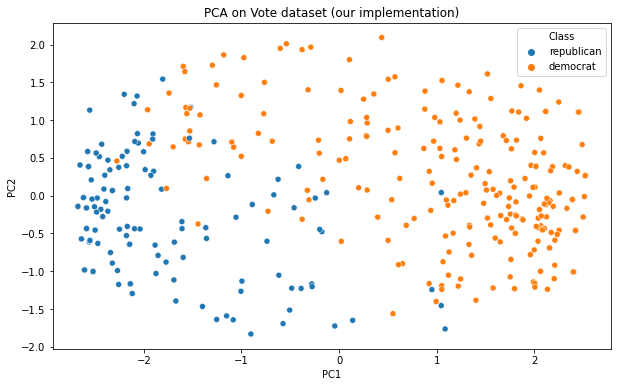

In [6]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca)
plt.title("PCA on Vote dataset (our implementation)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

As was previously mentioned, the first component is the one with higher variance. The second component has a lower variance than the first one but it is still higher than the third one. The third component has the lowest variance of all of them.

It's noticeable that the half of the Principal Components don't explain anything. This can be explained by the fact that the data is categorical and binary and in our One Hot Encoding, there is a column for Yes and another one for No. This causes that each pair of features are linearly dependent and hence, they don't provide any information, which is represented as a zero variance in the PC space.

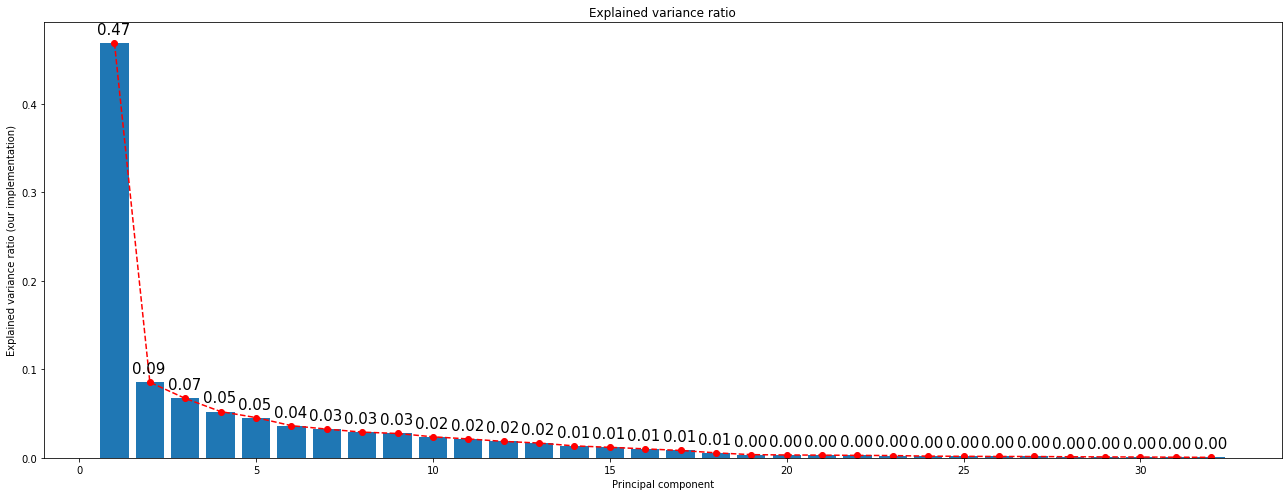

In [7]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio (our implementation)")
plt.tight_layout()
plt.show()

If our own PCA implementation is ran, the results are exactly the same. This is because the algorithm is the same and the results are the same. The only difference is that the algorithm is implemented in a different way.

However, in the following scatterplot can be seen that the plot is "rotated". This isn't something to worry about because the results are the same. When Principal Components are calculated, the only constraint is that they are orthogonal and unitary so there's ambiguity in the sign of the components. This is why the plot is rotated.

## 2.2. Sklearn PCA

In [8]:
# Same with sklearn PCA
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=X.shape[1])
X_sk_transformed = sklearn_pca.fit_transform(X)
df_skpca = pd.DataFrame(X_sk_transformed, 
                        columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_skpca['Class'] = df_orig['Class']

df_skpca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,Class
0,2.538132,0.208806,0.664641,-0.174588,-0.450081,0.372835,-0.342712,-0.149426,0.071028,0.088202,0.014216,-0.062397,0.035631,0.083581,0.334093,-0.067466,-0.103806,-0.084998,-0.194035,-0.116840,-0.063954,-0.032556,-0.040208,0.502563,-0.350131,-0.093052,-0.015151,0.057358,-0.055953,-0.086983,0.037589,-0.034739,republican
1,2.566310,0.385575,-0.730238,0.070440,-0.545899,-0.217791,-0.072360,-0.013179,0.147766,0.067335,0.063446,-0.102212,0.088777,0.055474,0.235120,-0.323896,-0.118923,-0.067583,-0.055898,0.013942,-0.015848,0.009364,-0.023076,0.038456,0.017603,0.017373,0.010990,0.028439,0.011197,0.007277,-0.007326,0.012443,republican
2,1.181888,1.863804,0.193548,-0.056694,0.517372,-0.423062,0.502881,-0.292557,-0.253667,-0.740869,-0.302280,-0.265238,-0.131323,-0.061430,-0.627787,0.543573,-0.158374,0.147428,0.160768,-0.201134,-0.110549,0.267333,-0.127386,0.192376,0.536218,-0.289405,-0.103437,0.053379,0.046933,0.245357,-0.465605,-0.119067,democrat
3,0.379323,1.932972,0.289399,0.558290,-0.143029,-0.476130,0.696174,-0.993519,-0.425815,0.144877,-0.735403,0.304607,0.056649,0.073266,0.151542,-0.021300,-0.427967,-0.090321,-0.088175,0.102039,-0.052618,0.035744,-0.342029,-0.141888,-0.056930,0.199440,0.300689,0.100067,-0.359571,0.139876,0.015469,0.047255,democrat
4,0.602853,1.949615,0.131991,0.089666,0.733314,0.200271,0.897574,0.964264,-0.386045,-0.106534,0.013759,-0.600394,0.444149,0.194505,0.169398,0.053131,-0.136412,-0.163178,-0.527231,-0.128020,0.079370,-0.174467,0.146585,-0.175545,0.119269,-0.014611,-0.068779,0.020821,-0.021380,0.006508,-0.020793,0.048986,democrat


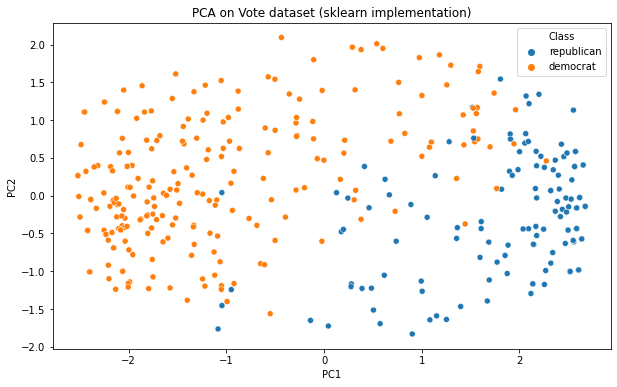

In [9]:

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_skpca)
plt.title("PCA on Vote dataset (sklearn implementation)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

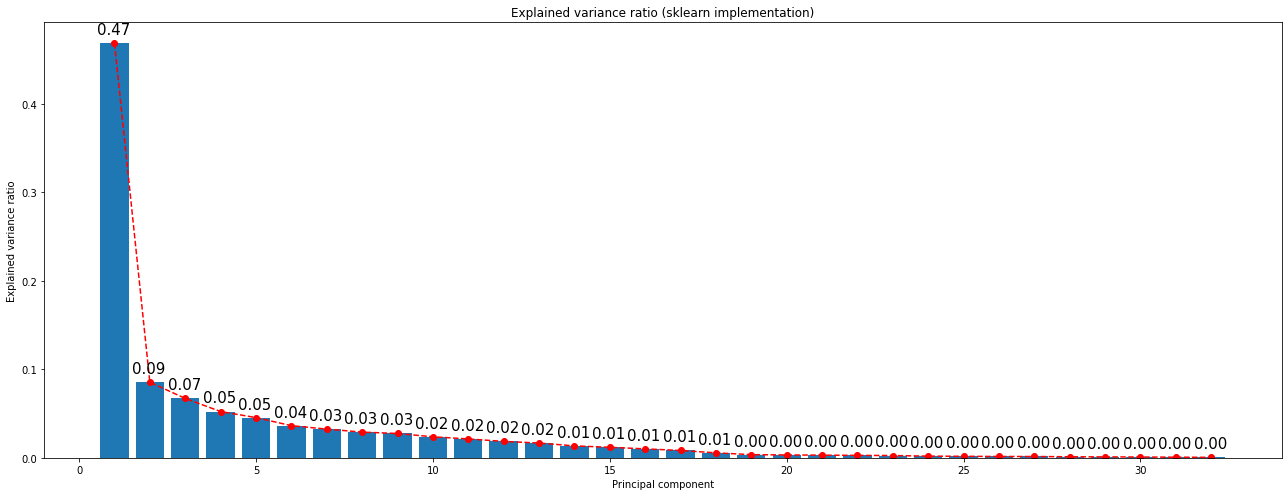

In [10]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (sklearn implementation)")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

# 3. Compare with IncrementalPCA

The PCA object proves to be beneficial but exhibits limitations when dealing with large datasets. Its primary drawback is its exclusive support for batch processing, necessitating that all data fit into main memory. In contrast, the IncrementalPCA object offers an alternative processing approach, enabling partial computations that closely align with PCA results while handling data in a minibatch manner. This facilitates the implementation of out-of-core Principal Component Analysis through two methods:

1. Utilizing the `partial_fit` method on sequentially fetched data chunks from the local hard drive or a network database.
2. Invoking the `fit` method on a sparse matrix or a memory-mapped file using `numpy.memmap`.

Notably, IncrementalPCA stores estimates of component and noise variances, updating `explained_variance_ratio_` incrementally. Consequently, memory usage is contingent on the number of samples per batch rather than the overall dataset size.

In [11]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=X.shape[1])
X_ipca_transformed = ipca.fit_transform(X)
df_ipca = pd.DataFrame(X_ipca_transformed, 
                        columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_ipca['Class'] = df_orig['Class']

df_ipca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,Class
0,2.538132,0.208806,0.664641,0.174588,-0.450081,0.372835,-0.342712,0.149426,-0.071028,-0.088202,-0.014216,0.062397,0.035631,0.083581,-0.334093,-0.067466,-0.103806,0.084998,-0.194035,-0.116840,-0.063954,0.032556,0.040208,-0.502563,-0.350131,-0.093052,0.015151,0.057358,0.055953,0.086983,0.037589,0.034739,republican
1,2.566310,0.385575,-0.730238,-0.070440,-0.545899,-0.217791,-0.072360,0.013179,-0.147766,-0.067335,-0.063446,0.102212,0.088777,0.055474,-0.235120,-0.323896,-0.118923,0.067583,-0.055898,0.013942,-0.015848,-0.009364,0.023076,-0.038456,0.017603,0.017373,-0.010990,0.028439,-0.011197,-0.007277,-0.007326,-0.012443,republican
2,1.181888,1.863804,0.193548,0.056694,0.517372,-0.423062,0.502881,0.292557,0.253667,0.740869,0.302280,0.265238,-0.131323,-0.061430,0.627787,0.543573,-0.158374,-0.147428,0.160768,-0.201134,-0.110549,-0.267333,0.127386,-0.192376,0.536218,-0.289405,0.103437,0.053379,-0.046933,-0.245357,-0.465605,0.119067,democrat
3,0.379323,1.932972,0.289399,-0.558290,-0.143029,-0.476130,0.696174,0.993519,0.425815,-0.144877,0.735403,-0.304607,0.056649,0.073266,-0.151542,-0.021300,-0.427967,0.090321,-0.088175,0.102039,-0.052618,-0.035744,0.342029,0.141888,-0.056930,0.199440,-0.300689,0.100067,0.359571,-0.139876,0.015469,-0.047255,democrat
4,0.602853,1.949615,0.131991,-0.089666,0.733314,0.200271,0.897574,-0.964264,0.386045,0.106534,-0.013759,0.600394,0.444149,0.194505,-0.169398,0.053131,-0.136412,0.163178,-0.527231,-0.128020,0.079370,0.174467,-0.146585,0.175545,0.119269,-0.014611,0.068779,0.020821,0.021380,-0.006508,-0.020793,-0.048986,democrat


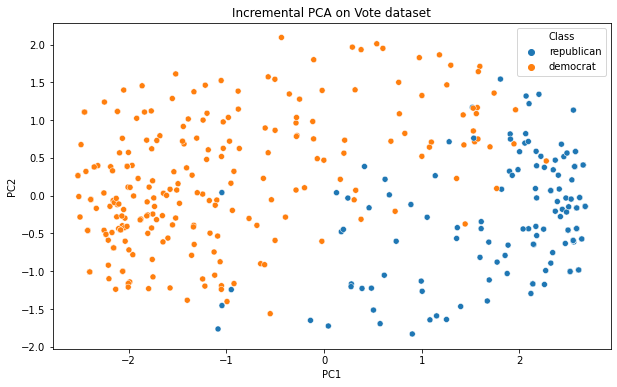

In [12]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_ipca)
plt.title("Incremental PCA on Vote dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

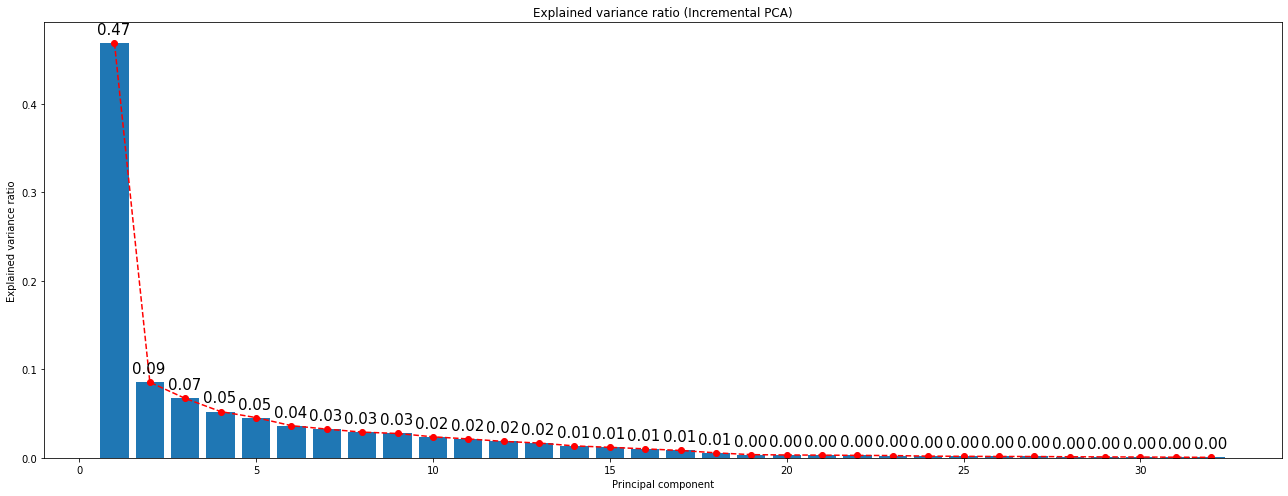

In [13]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), ipca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), ipca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (Incremental PCA)")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

The main difference is performance in time and memory. The IncrementalPCA is much faster for big datasets than the PCA and it uses less memory. However, the results are not exactly the same. The explained variance ratio is the same but the components are not. This is because the IncrementalPCA is an approximation of the PCA. The approximation is good but it is not exact.

What can be observed from the following comparison is that, when batch size is increased, IPCA is faster and uses less memory. However, in this case, approximation error from IPCA is negligible. This is observed from the difference in two first explained variance ratio and the average difference in components. The approximation error is not noticeable.

In the other hand, it doesn't either speed up the process. This is because the dataset is not big enough to notice the difference. However, if the dataset was bigger, the difference would be noticeable.

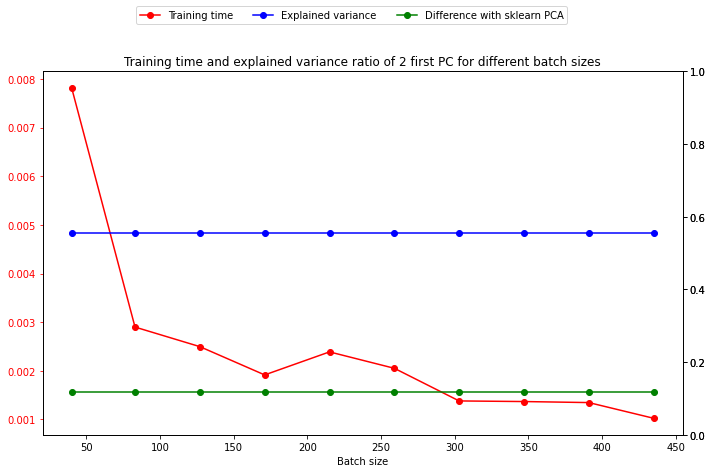

In [14]:
# Compare training time for different values of batch size
from time import time

batch_sizes = np.linspace(40, X.shape[0], 10, dtype=int)
times = []
explained = []
diffs = []
for batch_size in batch_sizes:
    ipca = IncrementalPCA(n_components=X.shape[1], batch_size=batch_size)
    start = time()
    ipca.fit(X)
    end = time()
    times.append(end - start)

    pct_explained_variance = ipca.explained_variance_ratio_[:2].sum()
    explained.append(pct_explained_variance)

    avg_dif = np.abs(ipca.components_ - sklearn_pca.components_).mean()
    diffs.append(avg_dif)

# Create double y axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(batch_sizes, times, linestyle='-', marker='o', color='r', label='Training time')
ax1.set_xlabel('Batch size')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.plot(batch_sizes, explained, linestyle='-', marker='o', color='b', label='Explained variance')
ax2.set_ylim([0, 1])

ax3 = ax1.twinx()
ax3.plot(batch_sizes, diffs, linestyle='-', marker='o', color='g', label='Difference with sklearn PCA')
ax3.set_ylim([0, 1])

fig.legend(bbox_to_anchor=(0.8, 1.1), ncol=3)
plt.title("Training time and explained variance ratio of 2 first PC for different batch sizes")
fig.tight_layout()

For a `batch_size` equal to the number of samples, the results are the same as the PCA. This is because the algorithm is the same. The only difference is that the algorithm is implemented in a different way. The visible difference in the plots can be due to external factors such as the random initialization of the algorithm.

Our implementation of PCA is faster than the incremental one until `batch_size` of 260. However, when `batch_size` is increased, the IPCA is faster as it is expected given that sklearn PCA is faster than ours.

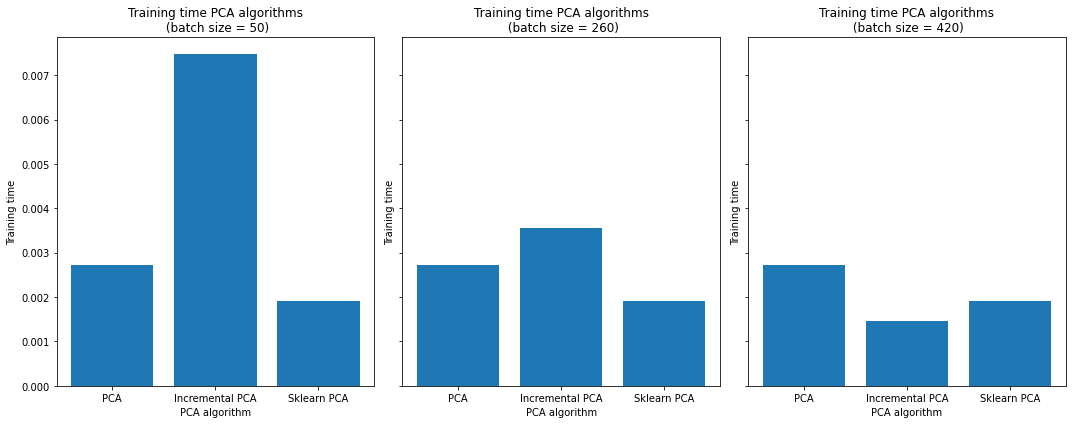

In [15]:
# Plot comparison of training time for PCA, Handmade PCA and Incremental PCA
from time import time

pca = PCA(n_components=X.shape[1])
start = time()
pca.fit(X)
end = time()
pca_time = end - start

sklearn_pca = sklearnPCA(n_components=X.shape[1], random_state=0)
start = time()
sklearn_pca.fit(X)
end = time()
sklearn_pca_time = end - start

fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
ls_batch_sizes = [50, 260, 420]

for i, bs in enumerate(ls_batch_sizes):
    ipca = IncrementalPCA(n_components=X.shape[1], batch_size=bs)
    start = time()
    ipca.fit(X)
    end = time()
    ipca_time = end - start

    ax[i].bar(['PCA', 'Incremental PCA', 'Sklearn PCA'], [pca_time, ipca_time, sklearn_pca_time])
    ax[i].set_title("Training time PCA algorithms\n (batch size = {})".format(bs))
    ax[i].set_xlabel("PCA algorithm")
    ax[i].set_ylabel("Training time")
fig.tight_layout()
plt.show()

# 4. Use PCA with k-Means and BIRCH to compare performances

As it was mentioned before, after projecting the data into the 2 first Principal Components, the classes are quite well separated. A lot of variables weren't providing almost any information in terms of variance. This causes the well known dimensionality curse, in which when the number of features is increased, the performance of the algorithm decreases. This is why PCA is used, to reduce the number of features and hence, the dimensionality of the data.

In [16]:
from sklearn.cluster import Birch
from src.clustering.KMeans import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, v_measure_score, confusion_matrix, classification_report

In [17]:
X = df.iloc[:, :-1]
y = df['Class']

n_clusters = len(np.unique(y))

birch = model_dbs = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Birch())
])

kmeans = model_dbs = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(k=n_clusters, max_iterations=100, random_state=0))])

In [18]:
def evaluate_model(model, X, y):
    model.fit(X)
    y_pred = model['model'].labels_
    return silhouette_score(X, y_pred), v_measure_score(y, y_pred)

# Cluster the transformed Data using BIRCH

/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


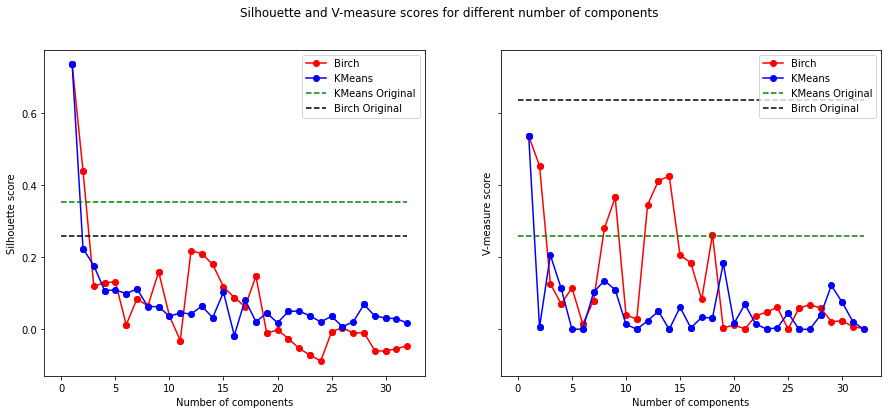

In [19]:
m = X.shape[1]
n_components = np.linspace(1, m, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_pca.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before PCA
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before PCA
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components")

plt.show()



As can be infered from the previous plot, in every case, incrementing the number of components even adding more information, leads to equal or worse results. This is because of the dimensionality curse. The more features, the worse the performance of the algorithm.

In the case of silhouette score, a model trained only with the first component has far better silhouette score than in the case of the model trained without applying PCA.

In the other hand, in terms of V-Measure, KMeans increases its performance when trained with just one component. However, Birch's performance slightly decreases. As it is an informed metric, it is more sensitive to the loss of information.

Another interesting fact is that both algorithms have exactly the same performance when trained with the first component.

In [20]:
print("Evaluation results on BIRCH using the original dataset")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(birch, X, y)))

print("-"*50)

print("Evaluation results on KMeans using the original dataset")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(kmeans, X, y)))

print("-"*50)

print("Evaluation results on Birch using the PC1")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(birch, df_pca.iloc[:, :1], y)))

print("-"*50)

print("Evaluation results on KMeans using the PC1")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(kmeans, df_pca.iloc[:, :1], y)))


Evaluation results on BIRCH using the original dataset
Silhouette 0.26 - V-Measure 0.64
--------------------------------------------------
Evaluation results on KMeans using the original dataset
Silhouette 0.35 - V-Measure 0.54
--------------------------------------------------
Evaluation results on Birch using the PC1
Silhouette 0.74 - V-Measure 0.54
--------------------------------------------------
Evaluation results on KMeans using the PC1
Silhouette 0.74 - V-Measure 0.54


/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


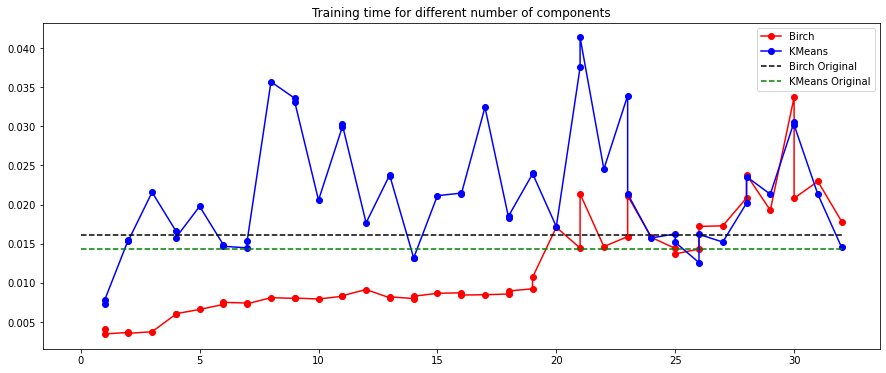

In [21]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_pca.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

Performance in time improves as well. This difference would be more noticeable if the dataset was bigger. From here, another advantage of dimensionality reduction method can be inferred. It is not only that the performance of the algorithm increases but also the time needed to train the algorithm decreases.

# 5. Cluster the transformed Data (SVD) using K-Means and Birch

Use sklearn.decomposition.truncatedSVD to reduce the dimensionality of your data sets
and cluster it with your own k-Means, the one that you implemented in Work 1, and with the
BIRCH from sklearn library. Compare your new results with the ones obtained previously. 

## Non Centered Data

In [22]:
print("Evaluation results on BIRCH using the original dataset")
evaluate_model(kmeans, X, y)

print("-"*50)

print("Evaluation results on KMeans using the transformed dataset")
evaluate_model(kmeans, X_transformed, y)

Evaluation results on BIRCH using the original dataset
--------------------------------------------------
Evaluation results on KMeans using the transformed dataset


(0.017437682260598455, 0.00013296131792626443)

In [23]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=X.shape[1] - 1)

X_transformed_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_transformed_svd, 
                        columns=[f'SV{i}' for i in range(1, X.shape[1])])
df_svd['Class'] = df_orig['Class']

df_svd.head()

,SV1,SV2,SV3,SV4,SV5,SV6,SV7,SV8,SV9,SV10,SV11,SV12,SV13,SV14,SV15,SV16,SV17,SV18,SV19,SV20,SV21,SV22,SV23,SV24,SV25,SV26,SV27,SV28,SV29,SV30,SV31,Class
0,2.706905,-2.462044,0.216076,0.663765,-0.177440,-0.452620,0.355019,0.351001,-0.144741,0.071644,0.084537,0.012704,-0.059501,0.041859,0.093005,-0.323160,-0.095188,-0.048505,0.219888,0.130710,-0.045030,-0.072630,-0.041316,0.506341,-0.347442,-0.095156,-0.014819,0.061107,-0.045548,-0.078290,0.038766,republican
1,2.929801,-2.476804,0.409878,-0.735057,0.086129,-0.541854,-0.202869,0.077300,-0.007093,0.144925,0.075641,0.069319,-0.108052,0.081453,0.055137,-0.364810,-0.150902,-0.090726,0.016801,0.026638,0.054249,-0.005163,-0.023953,0.037753,0.021015,0.016333,0.012717,0.023752,0.021496,0.009027,-0.006880,republican
2,2.464877,-1.118496,1.868968,0.186572,-0.044793,0.521160,-0.395461,-0.507224,-0.300204,-0.250590,-0.750482,-0.321472,-0.254398,-0.124907,-0.067336,0.832805,-0.115960,0.151396,-0.264236,0.225748,0.075196,-0.071340,-0.061216,0.192636,0.511373,-0.274106,-0.133858,0.072738,0.008212,0.215397,-0.472181,democrat
3,2.550674,-0.309425,1.947335,0.281316,0.578173,-0.135623,-0.430641,-0.691838,-1.007132,-0.411487,0.145364,-0.736713,0.311669,0.068297,0.080100,-0.120647,-0.422268,-0.065713,0.093182,-0.031710,0.136896,-0.026567,-0.324188,-0.138099,-0.075149,0.190513,0.300604,0.150770,-0.341983,0.170324,0.017111,democrat
4,2.510163,-0.536051,1.955368,0.125136,0.098325,0.735701,0.230853,-0.899536,0.952865,-0.393104,-0.103138,0.011077,-0.602552,0.442693,0.200991,-0.121896,-0.115606,-0.091374,0.578805,0.187435,-0.093874,0.052910,0.098782,-0.179951,0.131668,-0.012814,-0.066961,0.014676,0.000094,0.015278,-0.019194,democrat


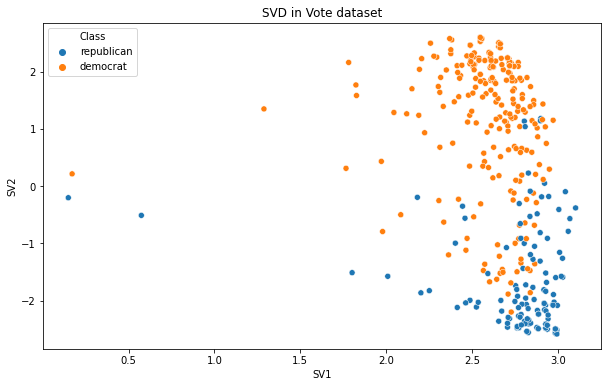

In [24]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SV1', y='SV2', hue='Class', data=df_svd)
plt.title("SVD in Vote dataset")
plt.xlabel("SV1")
plt.ylabel("SV2")
plt.show()

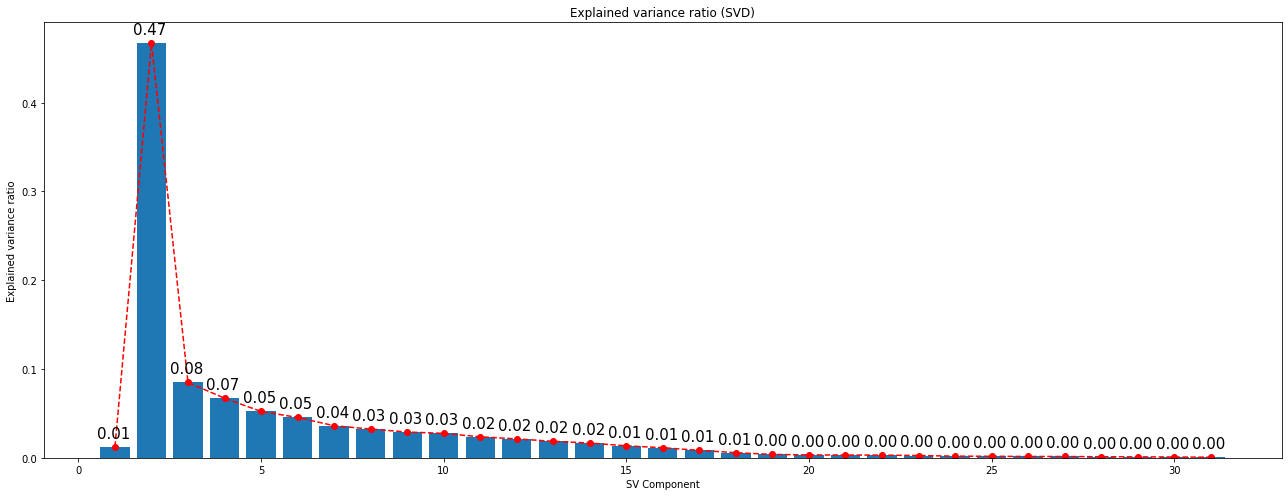

In [25]:
# Plot explained variance
svd_in = svd
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1]), svd_in.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1]), svd_in.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), svd_in.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (SVD)")
plt.xlabel("SV Component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

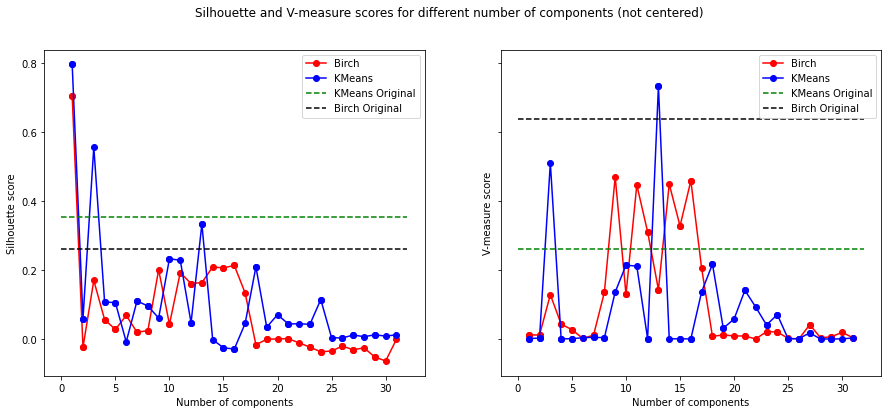

In [26]:
m = X.shape[1]
n_components = np.linspace(1, m - 1, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_svd.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components (not centered)")

plt.show()

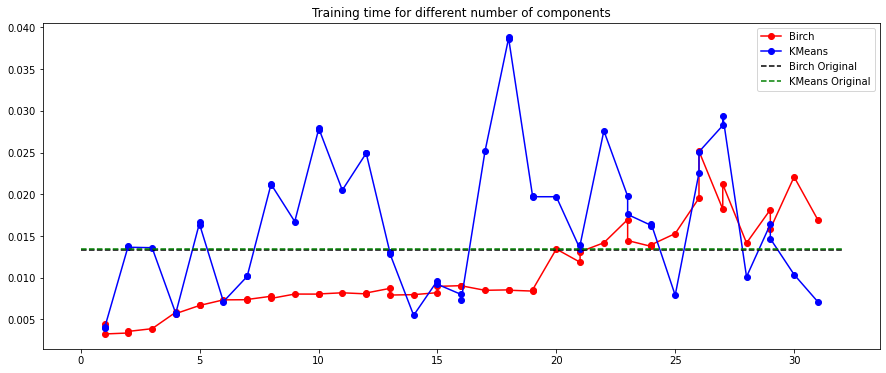

In [27]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m - 1, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_svd.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

Behavior is strange. Singular Values are usually sorted from higher to lower magnitude. IN this case, the first one is lower than the second one and, after that, the behavior is the expected one. In Figure Scatter, there are a couple of points which are clearly separated from the rest of the distribution. These outliers are the ones that are causing this behavior.

If data gets scaled and centered, the behavior is the expected one. The first singular value is the highest one and the rest are sorted from higher to lower magnitude.

Indeed, the same behavior than PCA is observed.

## Centered Version

In [28]:
from sklearn.decomposition import TruncatedSVD
svd = Pipeline([
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=X.shape[1] - 1))])

X_transformed_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_transformed_svd, 
                        columns=[f'SV{i}' for i in range(1, X.shape[1])])
df_svd['Class'] = df_orig['Class']

df_svd.head()

,SV1,SV2,SV3,SV4,SV5,SV6,SV7,SV8,SV9,SV10,SV11,SV12,SV13,SV14,SV15,SV16,SV17,SV18,SV19,SV20,SV21,SV22,SV23,SV24,SV25,SV26,SV27,SV28,SV29,SV30,SV31,Class
0,5.089195,0.481182,1.282707,-0.481998,-0.939985,-0.719378,-0.622784,0.315812,-0.519530,0.245919,-0.491167,0.690426,-0.360597,0.080607,0.072331,0.149003,-0.145343,-0.170224,-0.402176,0.257855,-0.162429,-0.072173,-0.123731,1.131917,-0.546056,-0.185333,-0.033954,0.112733,-0.104633,-0.166495,-0.074079,republican
1,5.150858,0.597434,-1.472942,0.084576,-1.127143,0.646823,-0.260135,0.449064,-0.422497,0.158145,-0.362359,0.749902,-0.276480,0.177711,0.046565,-0.439715,-0.141982,-0.121187,-0.108445,-0.036860,-0.034417,0.022955,-0.050460,0.068347,0.047286,0.034684,0.023176,0.055234,0.024556,0.013779,0.014400,republican
2,2.506092,3.859816,0.030941,-0.091015,1.005174,0.502965,0.947179,-1.583992,0.439542,-1.574457,0.188367,-1.169122,1.425063,-0.319361,0.070857,0.514482,-0.508108,0.273925,0.339569,0.413232,-0.212984,0.524901,-0.256042,0.198944,1.117413,-0.590248,-0.189042,0.095515,0.177916,0.519762,0.944423,democrat
3,0.704811,3.963044,0.365158,0.975591,-0.493121,0.993342,1.219866,-1.805942,-0.749760,0.452403,-1.923109,-0.539761,-0.564038,0.163406,0.094976,0.021694,-0.822587,-0.169035,-0.166521,-0.236420,-0.089501,0.103128,-0.659040,-0.287937,-0.156539,0.349968,0.560358,0.263655,-0.755789,0.315873,-0.037234,democrat
4,1.151610,3.979959,0.076543,0.154094,1.320448,0.101423,1.939990,1.415566,1.543794,-0.294791,-0.521206,1.019353,0.805269,0.833591,0.339130,0.235541,-0.250361,-0.340924,-1.055564,0.264756,0.112771,-0.371130,0.289921,-0.406377,0.188522,-0.043836,-0.142337,0.041941,-0.031781,0.015934,0.041066,democrat


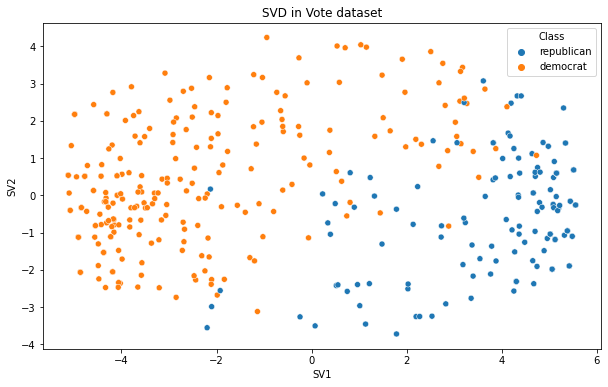

In [29]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SV1', y='SV2', hue='Class', data=df_svd)
plt.title("SVD in Vote dataset")
plt.xlabel("SV1")
plt.ylabel("SV2")
plt.show()

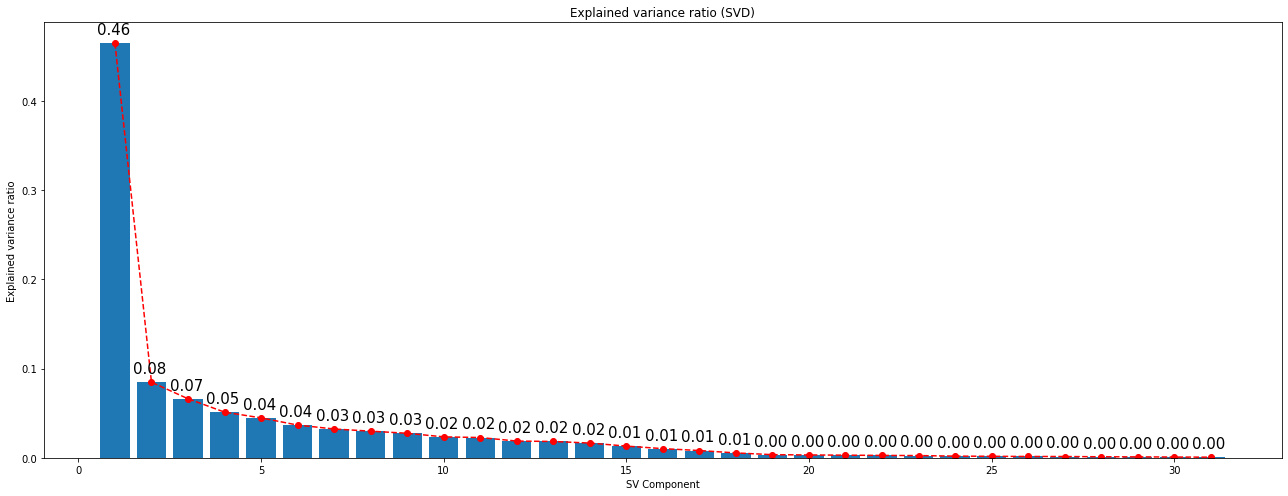

In [30]:
# Plot explained variance
svd_in = svd['svd']
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1]), svd_in.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1]), svd_in.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), svd_in.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (SVD)")
plt.xlabel("SV Component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


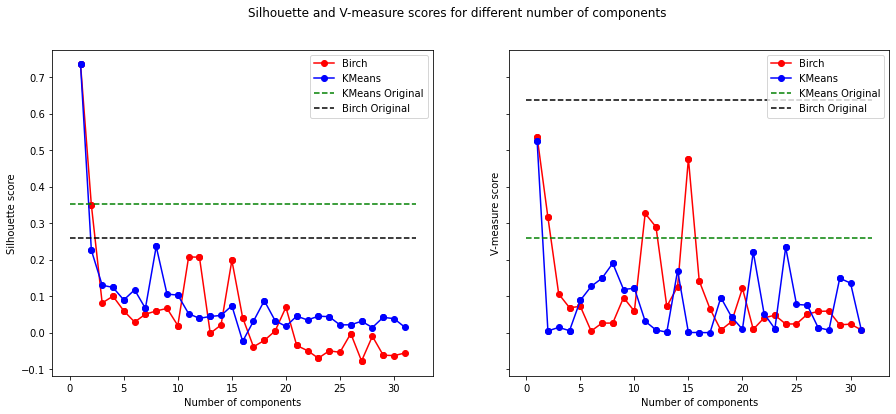

In [31]:
m = X.shape[1]
n_components = np.linspace(1, m - 1, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_svd.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components")

plt.show()



/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


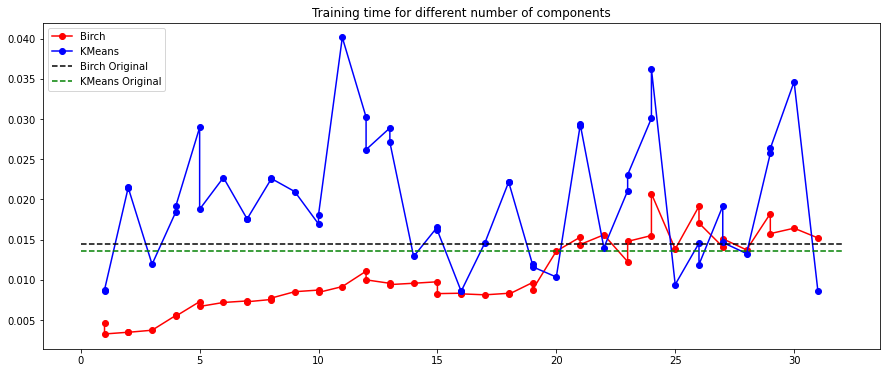

In [32]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m - 1, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_svd.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

The results are exactly the same than for the case of PCA. 

In [33]:
print("Evaluation results on BIRCH using the transformed dataset")
evaluate_model(birch, X_transformed_svd[:, :1], y)

Evaluation results on BIRCH using the transformed dataset


/home/alberto/anaconda3/envs/iml_project/lib/python3.7/site-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,


(0.7343127013809588, 0.5368847869421306)

In [34]:
print("Evaluation results on KMeans using the transformed dataset")
evaluate_model(kmeans, X_transformed_svd[:, :1], y)

Evaluation results on KMeans using the transformed dataset


(0.7342234950068158, 0.5256846352651141)

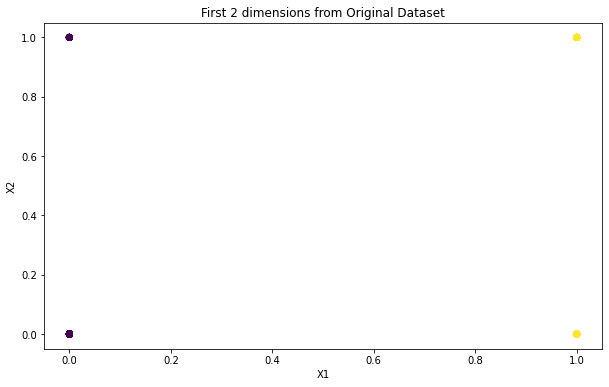

In [35]:
# Visualize the original Dataset
plt.figure(figsize=(10, 6))
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], c=df['Class'])
plt.title("First 2 dimensions from Original Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 6. Visualize in low-dimensional space

Visualize in low-dimensional space. You need to visualize your original data sets, the result of
the k-Means and BIRCH algorithms without the dimensionality reduction, and the result of the
k-Means and BIRCH algorithms with the dimensionality reduction. To visualize in a lowdimensional space (2D or 3D) you will use: PCA and ISOMAP. You will find useful information
of how to deal with this algorithm at:

Given that the data is categorical, the visualization of its 2 first components is not very useful. Until now, 2 first linear projections have been used in order to visualize the data, such as SVD and PCA. The result is that they both provide similar information.

In this case, Self Organized Maps are used in order to have a nonlinear point of view, i.e. to use a different approach.

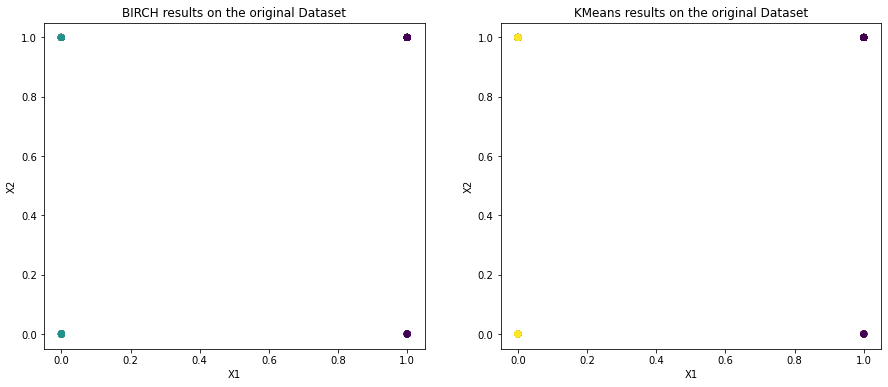

In [36]:
birch.fit(X)
kmeans.fit(X)

# Visualize the results of BIRCH and KMenas on the original Dataset
figure, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=birch['model'].labels_)
axs[0].set_title("BIRCH results on the original Dataset")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")

axs[1].scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=kmeans['model'].labels_)
axs[1].set_title("KMeans results on the original Dataset")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
plt.show()

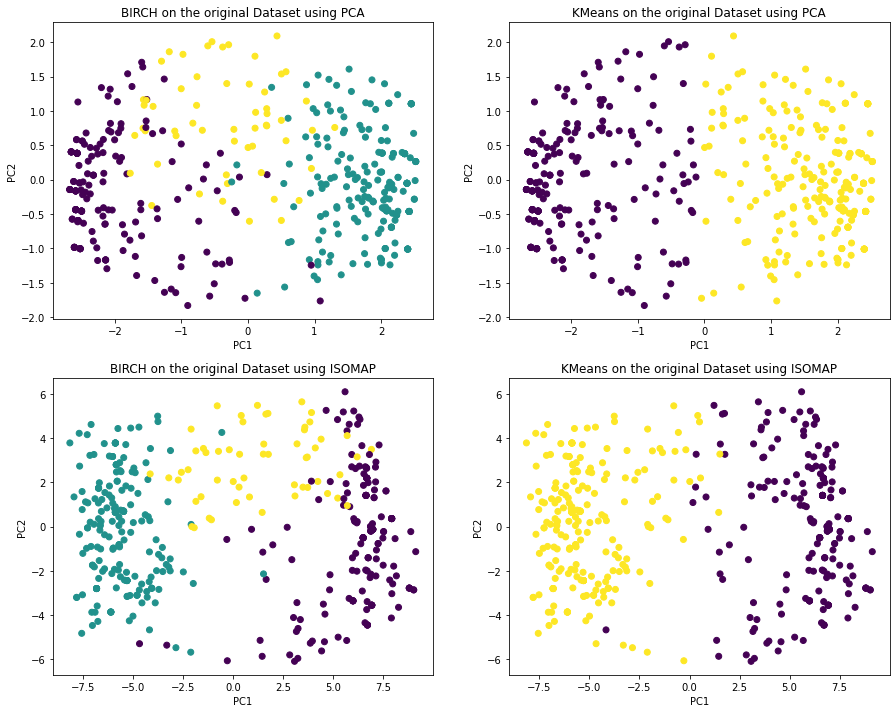

In [37]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)

X_transformed = pca.fit_transform(X)
X_transformed_isomap = isomap.fit_transform(X)

# Visualize results of BIRCH and KMeans on the original Dataset using PCA and ISOMAP
figure, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0, 0].scatter(X_transformed[:, 0], X_transformed[:, 1], c=birch['model'].labels_)
axs[0, 0].set_title("BIRCH on the original Dataset using PCA")
axs[0, 0].set_xlabel("PC1")
axs[0, 0].set_ylabel("PC2")

axs[0, 1].scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeans['model'].labels_)
axs[0, 1].set_title("KMeans on the original Dataset using PCA")
axs[0, 1].set_xlabel("PC1")
axs[0, 1].set_ylabel("PC2")

axs[1, 0].scatter(X_transformed_isomap[:, 0], X_transformed_isomap[:, 1], c=birch['model'].labels_)
axs[1, 0].set_title("BIRCH on the original Dataset using ISOMAP")
axs[1, 0].set_xlabel("PC1")
axs[1, 0].set_ylabel("PC2")

axs[1, 1].scatter(X_transformed_isomap[:, 0], X_transformed_isomap[:, 1], c=kmeans['model'].labels_)
axs[1, 1].set_title("KMeans on the original Dataset using ISOMAP")
axs[1, 1].set_xlabel("PC1")
axs[1, 1].set_ylabel("PC2")
plt.show()


In this case, both algorithms provide similar information. This can be due to the fact that the data is not very complex and hence, the linear projection is enough to visualize the data.